Escolha um número de 0 a 657:  234
Escolha outro (exceto o número 234):  234


Escolha um número diferente do número anterior.


Escolha outro (exceto o número 234):  345


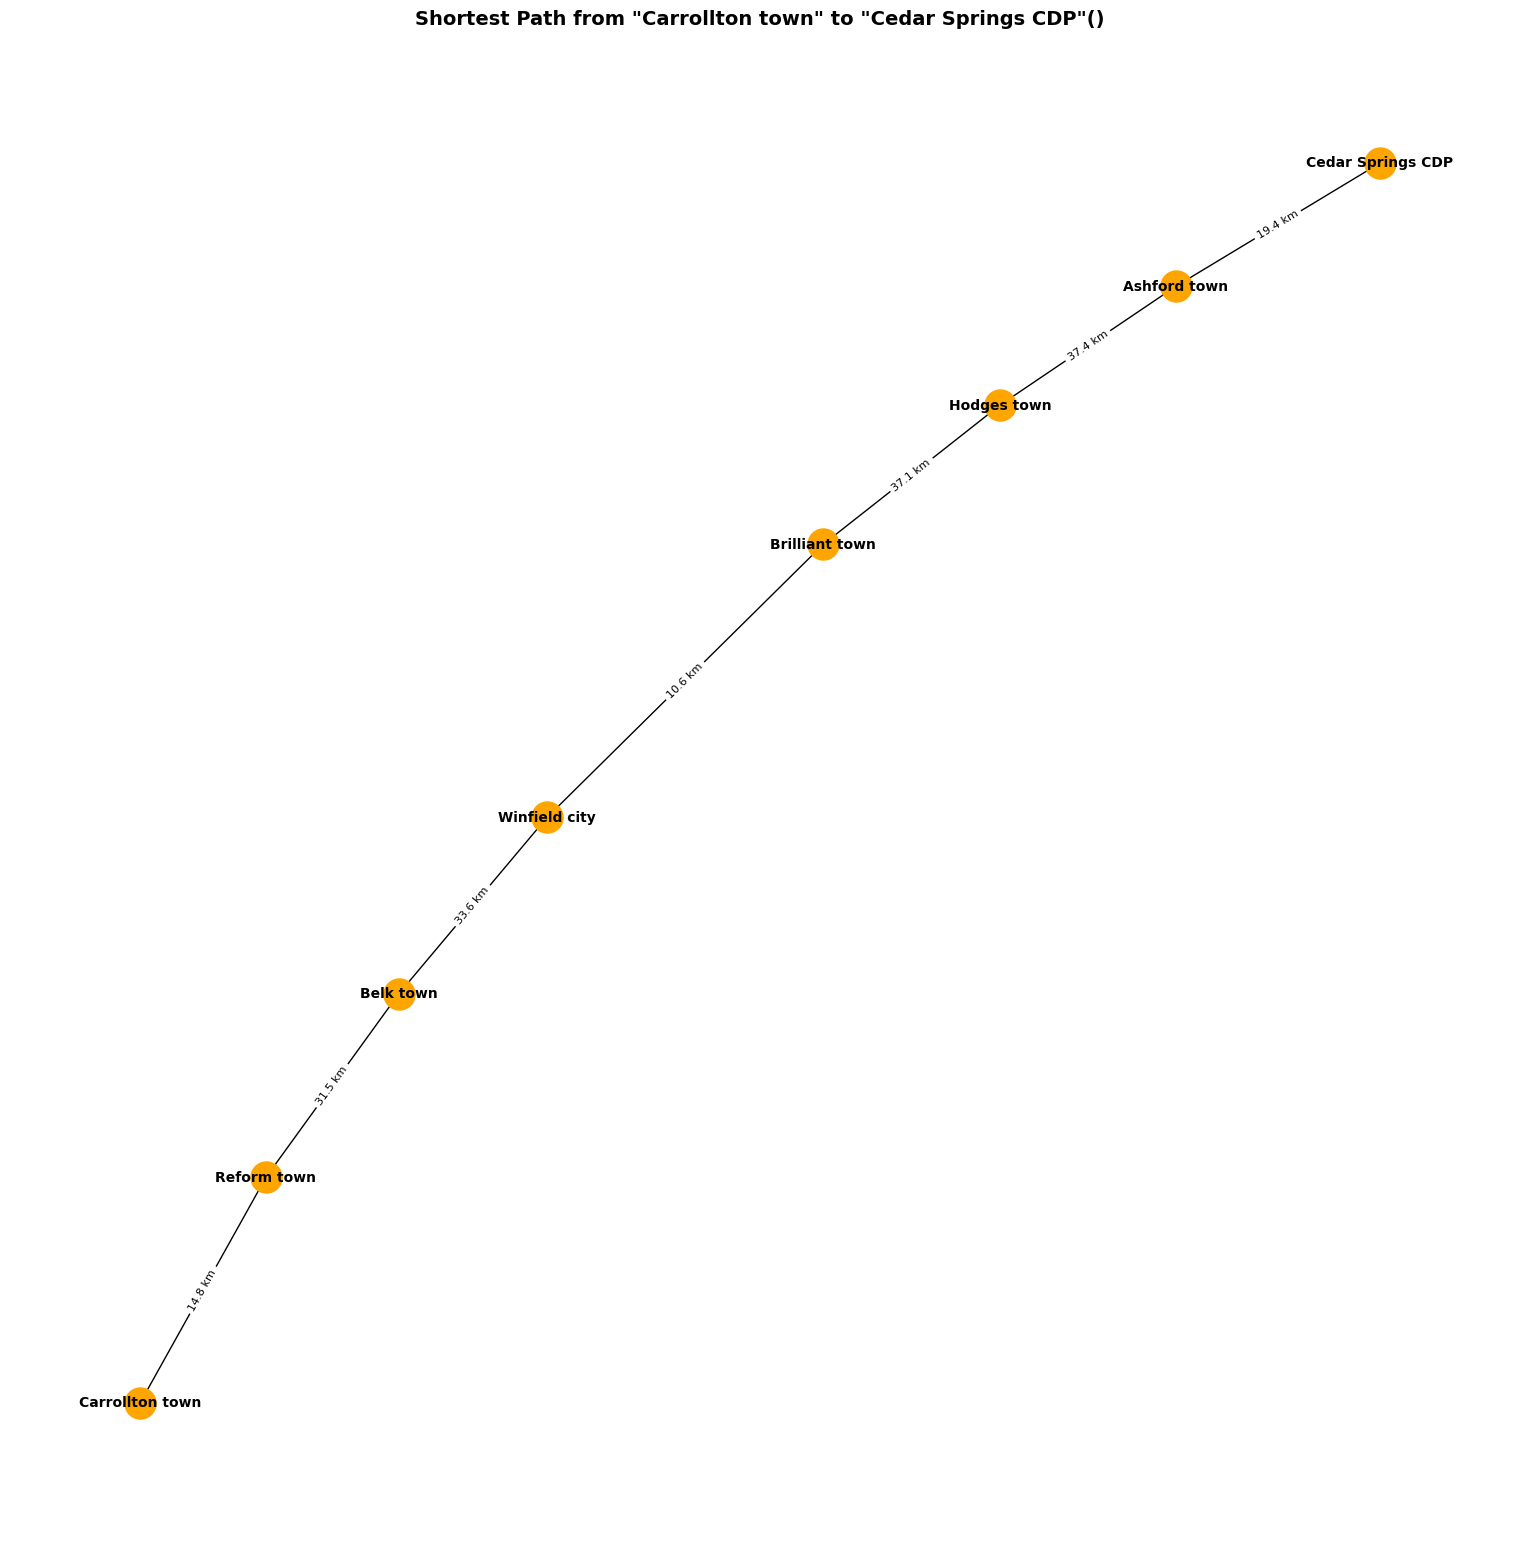

In [ ]:
import heapq
import csv
import networkx as nx
import matplotlib.pyplot as plt

edge_file = './dataset/edge.csv'
identifiers_file = './dataset/identifiers.csv'

def dijkstra(graph, start, end):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    predecessors = {vertex: None for vertex in graph}
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        if current_vertex == end:
            path = []
            while current_vertex is not None:
                path.insert(0, current_vertex)
                current_vertex = predecessors[current_vertex]
            return path

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return []

def createGraph(file_path):
    graph = {}
    with open(file_path, newline='', encoding='latin1') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            place1 = row["place1"]
            mi_to_place = float(row["mi_to_place"]) * 1.609
            place2 = row["place2"]
            
            graph.setdefault(place1, {})[place2] = mi_to_place
            graph.setdefault(place2, {})[place1] = mi_to_place
    
    return graph

def getPlaceName(node):
    with open(identifiers_file, newline='', encoding='latin1') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['place'] == node:
                return row['placename']

def drawPath(graph, shortest_path, start, end):
    G = nx.Graph()

    for place, neighbors in graph.items():
        G.add_node(place)

        for neighbor, distance in neighbors.items():
            G.add_edge(place, neighbor, weight=distance)

    subgraph = G.subgraph(shortest_path)

    pos = nx.spring_layout(subgraph, seed=5)
    labels = {place: getPlaceName(place) for place in shortest_path}
    edge_labels = {(u, v): f"{round(G[u][v]['weight'], 1)} km" for (u, v) in subgraph.edges()}

    plt.figure(figsize=(15, 15))
    nx.draw(subgraph, pos, with_labels=True, labels=labels, node_size=500, node_color='orange', font_size=10, font_color='black', font_weight='bold')
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=8)
    plt.title(
        f'Shortest Path from "{getPlaceName(start)}" to "{getPlaceName(end)}"()',
        {'fontsize': 14,
         'fontweight': 900,
         'color': 'black'}
    )
    plt.show()

def chooseNodes(graph):
    all_nodes = list(graph.keys())

    while True:
        try:
            start_index = int(input("Escolha um número de 0 a 657: "))
            if start_index < 0 or start_index > 657:
                print("Escolha um número dentro do intervalo permitido.")
                continue

            break
        except ValueError:
            print("Entrada inválida. Digite um número inteiro.")

    while True:
        try:
            end_index = int(input(f"Escolha outro (exceto o número {start_index}): "))
            if end_index < 0 or end_index > 657:
                print("Escolha um número dentro do intervalo permitido e diferente do número anterior.")
                continue
            if end_index == start_index:
                print("Escolha um número diferente do número anterior.")
                continue

            break
        except ValueError:
            print("Entrada inválida. Digite um número inteiro.")

    start_node = all_nodes[start_index]
    end_node = all_nodes[end_index]

    return start_node, end_node

def main():
    graph = createGraph(edge_file)
    start_node, end_node = chooseNodes(graph)
    shortest_path = dijkstra(graph, start_node, end_node)
    drawPath(graph, shortest_path, start_node, end_node)

if __name__ == "__main__":
    main()